In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("diabetes_prediction.csv")

In [3]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: xlabel='age', ylabel='heart_disease'>

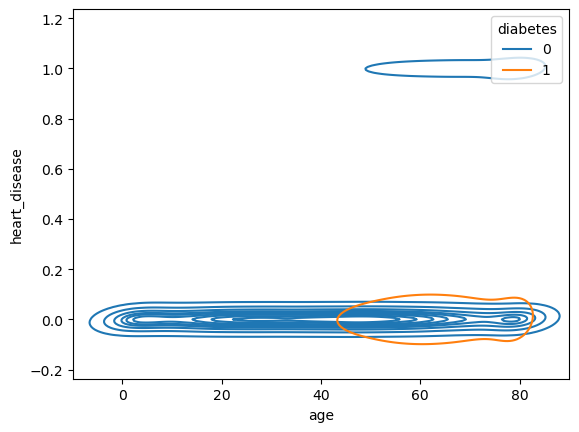

In [9]:
sns.kdeplot(x="age", y="heart_disease", hue="diabetes", data=df)

In [15]:
x=["gender", "hypertension", "heart_disease", "smoking_history"]
for i in x:
    print( df[i].unique())
    print()
    print(df[i].value_counts())

['Female' 'Male' 'Other']

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
[0 1]

0    92515
1     7485
Name: hypertension, dtype: int64
[1 0]

0    96058
1     3942
Name: heart_disease, dtype: int64
['never' 'No Info' 'current' 'former' 'ever' 'not current']

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


<Axes: xlabel='smoking_history', ylabel='count'>

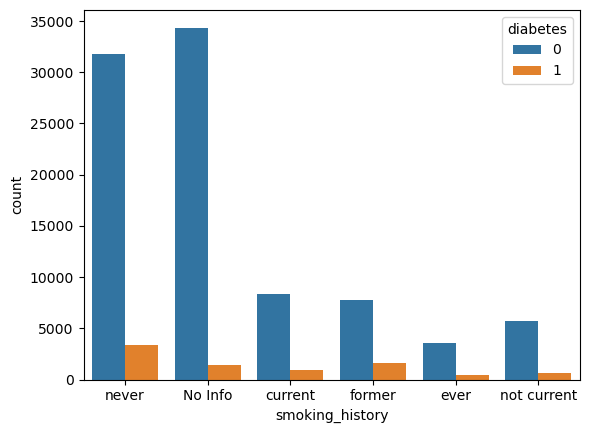

In [16]:
sns.countplot(x="smoking_history", hue="diabetes", data=df)

<Axes: xlabel='heart_disease', ylabel='count'>

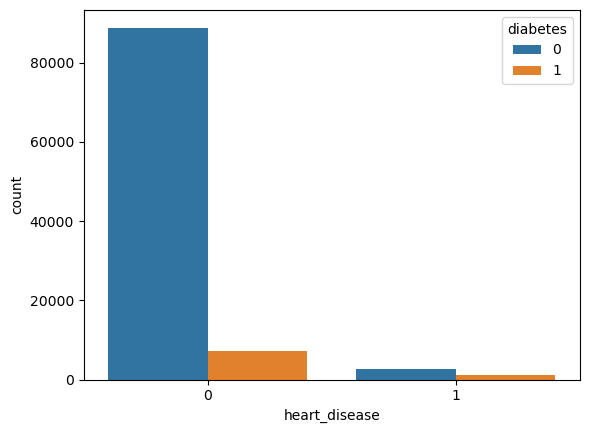

In [17]:
sns.countplot(x="heart_disease", hue="diabetes", data=df)

<Axes: xlabel='HbA1c_level', ylabel='count'>

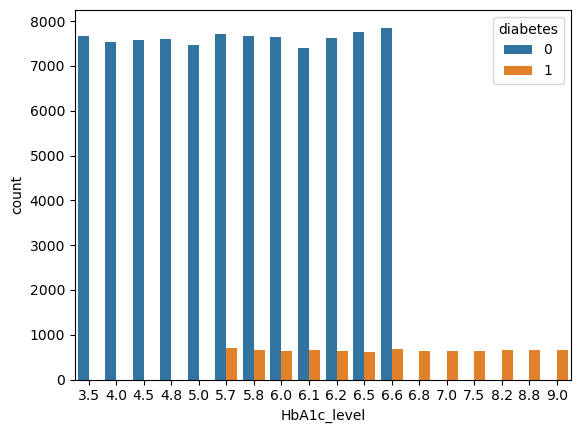

In [19]:
sns.countplot(x="HbA1c_level", hue="diabetes", data=df)

<Axes: xlabel='blood_glucose_level', ylabel='count'>

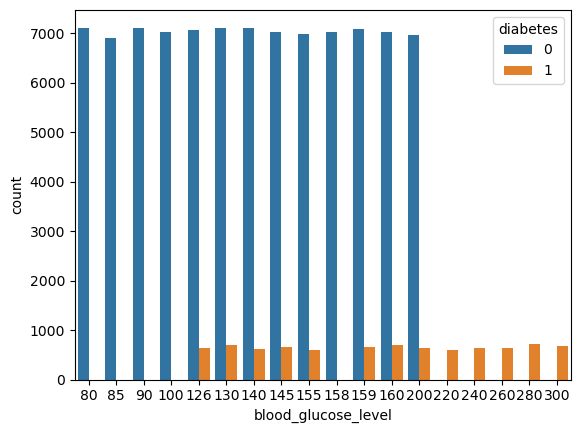

In [20]:
sns.countplot(x="blood_glucose_level", hue="diabetes", data=df)

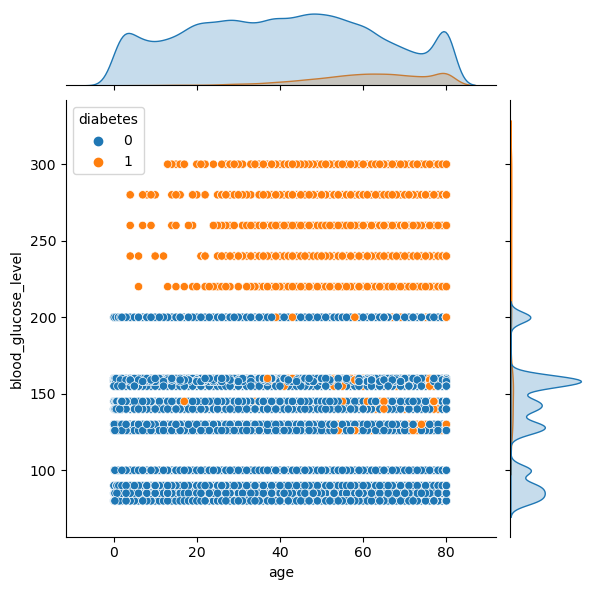

In [23]:
sns.jointplot(x="age", y="blood_glucose_level",hue="diabetes", data=df)

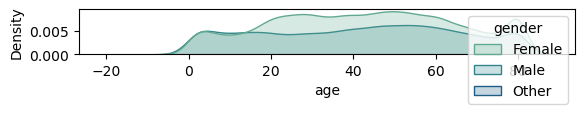

C:\Users\mukhe\AppData\Local\Temp\ipykernel_24000\372948430.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=i, hue="gender",data=df,fill=True, palette="crest")


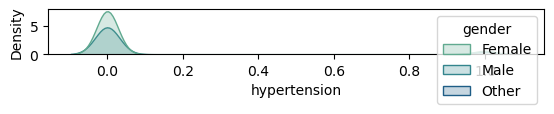

C:\Users\mukhe\AppData\Local\Temp\ipykernel_24000\372948430.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=i, hue="gender",data=df,fill=True, palette="crest")


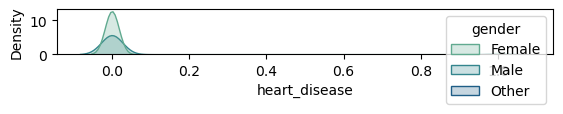

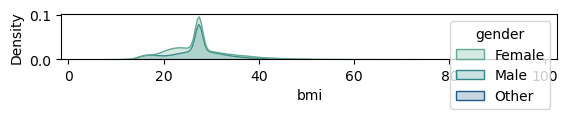

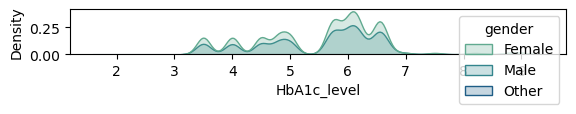

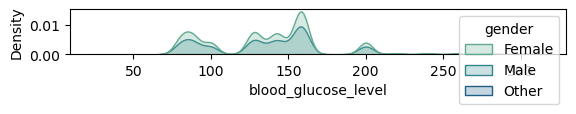

In [36]:
x=["age","hypertension", "heart_disease",  "bmi", "HbA1c_level", "blood_glucose_level"]
c=1
for i in x:
    plt.subplot(7,1,c)
    sns.kdeplot(x=i, hue="gender",data=df,fill=True, palette="crest")
    c=c+1
    plt.show()

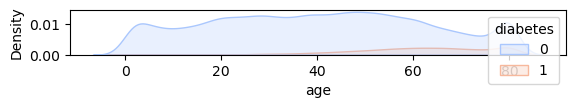

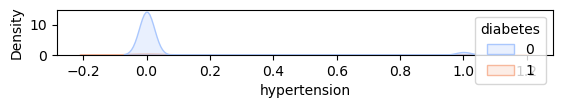

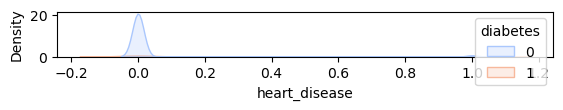

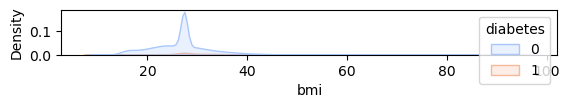

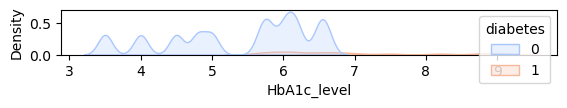

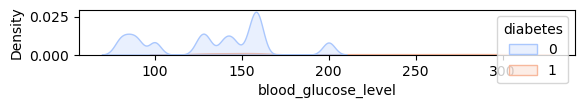

In [38]:
x=["age","hypertension", "heart_disease",  "bmi", "HbA1c_level", "blood_glucose_level"]
c=1
for i in x:
    plt.subplot(7,1,c)
    sns.kdeplot(x=i, hue="diabetes",data=df,fill=True, palette="coolwarm")
    c=c+1
    plt.show()

<Axes: >

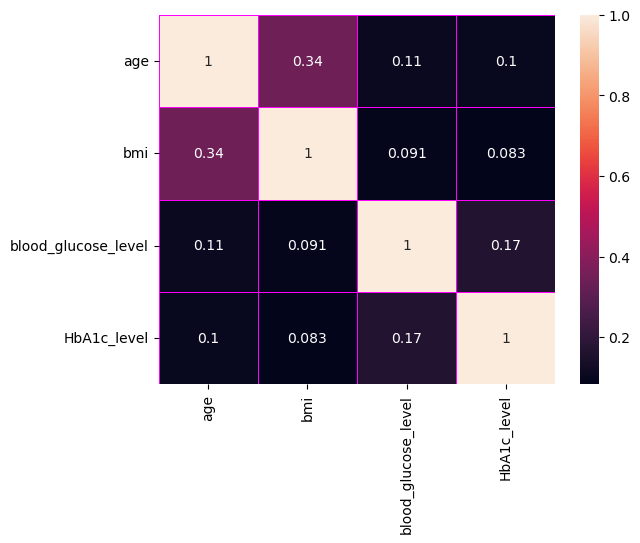

In [16]:
sns.heatmap(df[["age", "bmi", "blood_glucose_level", "HbA1c_level"]].corr(), annot=True, linewidth= 0.5, linecolor="magenta")

In [18]:
df_dummies = pd.get_dummies(df, columns= ["gender", "smoking_history"])
df_dummies.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
5,20.0,0,0,27.32,6.6,85,0,1,0,0,0,0,0,0,1,0
6,44.0,0,0,19.31,6.5,200,1,1,0,0,0,0,0,0,1,0
7,79.0,0,0,23.86,5.7,85,0,1,0,0,1,0,0,0,0,0
8,42.0,0,0,33.64,4.8,145,0,0,1,0,0,0,0,0,1,0
9,32.0,0,0,27.32,5.0,100,0,1,0,0,0,0,0,0,1,0


DECISION TREE CLASSIFIER:

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X= df_dummies.drop(["diabetes"], axis=1)
y= df_dummies["diabetes"]

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33, random_state=42)

Sc= StandardScaler()

X_train= Sc.fit_transform(X_train)
X_test= Sc.transform(X_test)


dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=8)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

In [26]:
accuracy= accuracy_score(y_test, y_pred)
classification=classification_report(y_test, y_pred, output_dict=True)
#cm= confusion_matrix(y_test, y_pred)
c= pd.DataFrame(classification)

print("accuracy score: ",accuracy )
print()
print("clasification report: ", c)
print()

accuracy score:  0.9718787878787879

clasification report:                        0            1  accuracy     macro avg  weighted avg
precision      0.970868     0.988421  0.971879      0.979645      0.972349
recall         0.999272     0.674569  0.971879      0.836920      0.971879
f1-score       0.984865     0.801879  0.971879      0.893372      0.969428
support    30216.000000  2784.000000  0.971879  33000.000000  33000.000000



In [73]:
b= dt_classifier.feature_importances_
c= X.columns.tolist()

a= pd.DataFrame({"Features":c, "Importances":b})
a

,Features,Importances
0,age,0.065705
1,hypertension,0.005856
2,heart_disease,0.004486
3,bmi,0.112788
4,HbA1c_level,0.492258
5,blood_glucose_level,0.268125
6,gender_Female,0.008696
7,gender_Male,0.007386
8,gender_Other,0.000000
9,smoking_history_No Info,0.006194


In [79]:
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier_entropy.fit(X_train, y_train)
y_pred_entropy = dt_classifier_entropy.predict(X_test)

# Calculate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Print accuracy and impurity measures
print("\nEntropy:")
print(dt_classifier_entropy.tree_.impurity)


Entropy:
[0.42063011 0.27809766 0.19343746 ... 0.         0.         0.        ]


In [80]:
dt_classifier_entropy = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_classifier_entropy.fit(X_train, y_train)
y_pred_entropy = dt_classifier_entropy.predict(X_test)

# Calculate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Print accuracy and impurity measures
print("\nEntropy:")
print(dt_classifier_entropy.tree_.impurity)


Entropy:
[0.1560701  0.09150029 0.05784248 ... 0.         0.         0.        ]


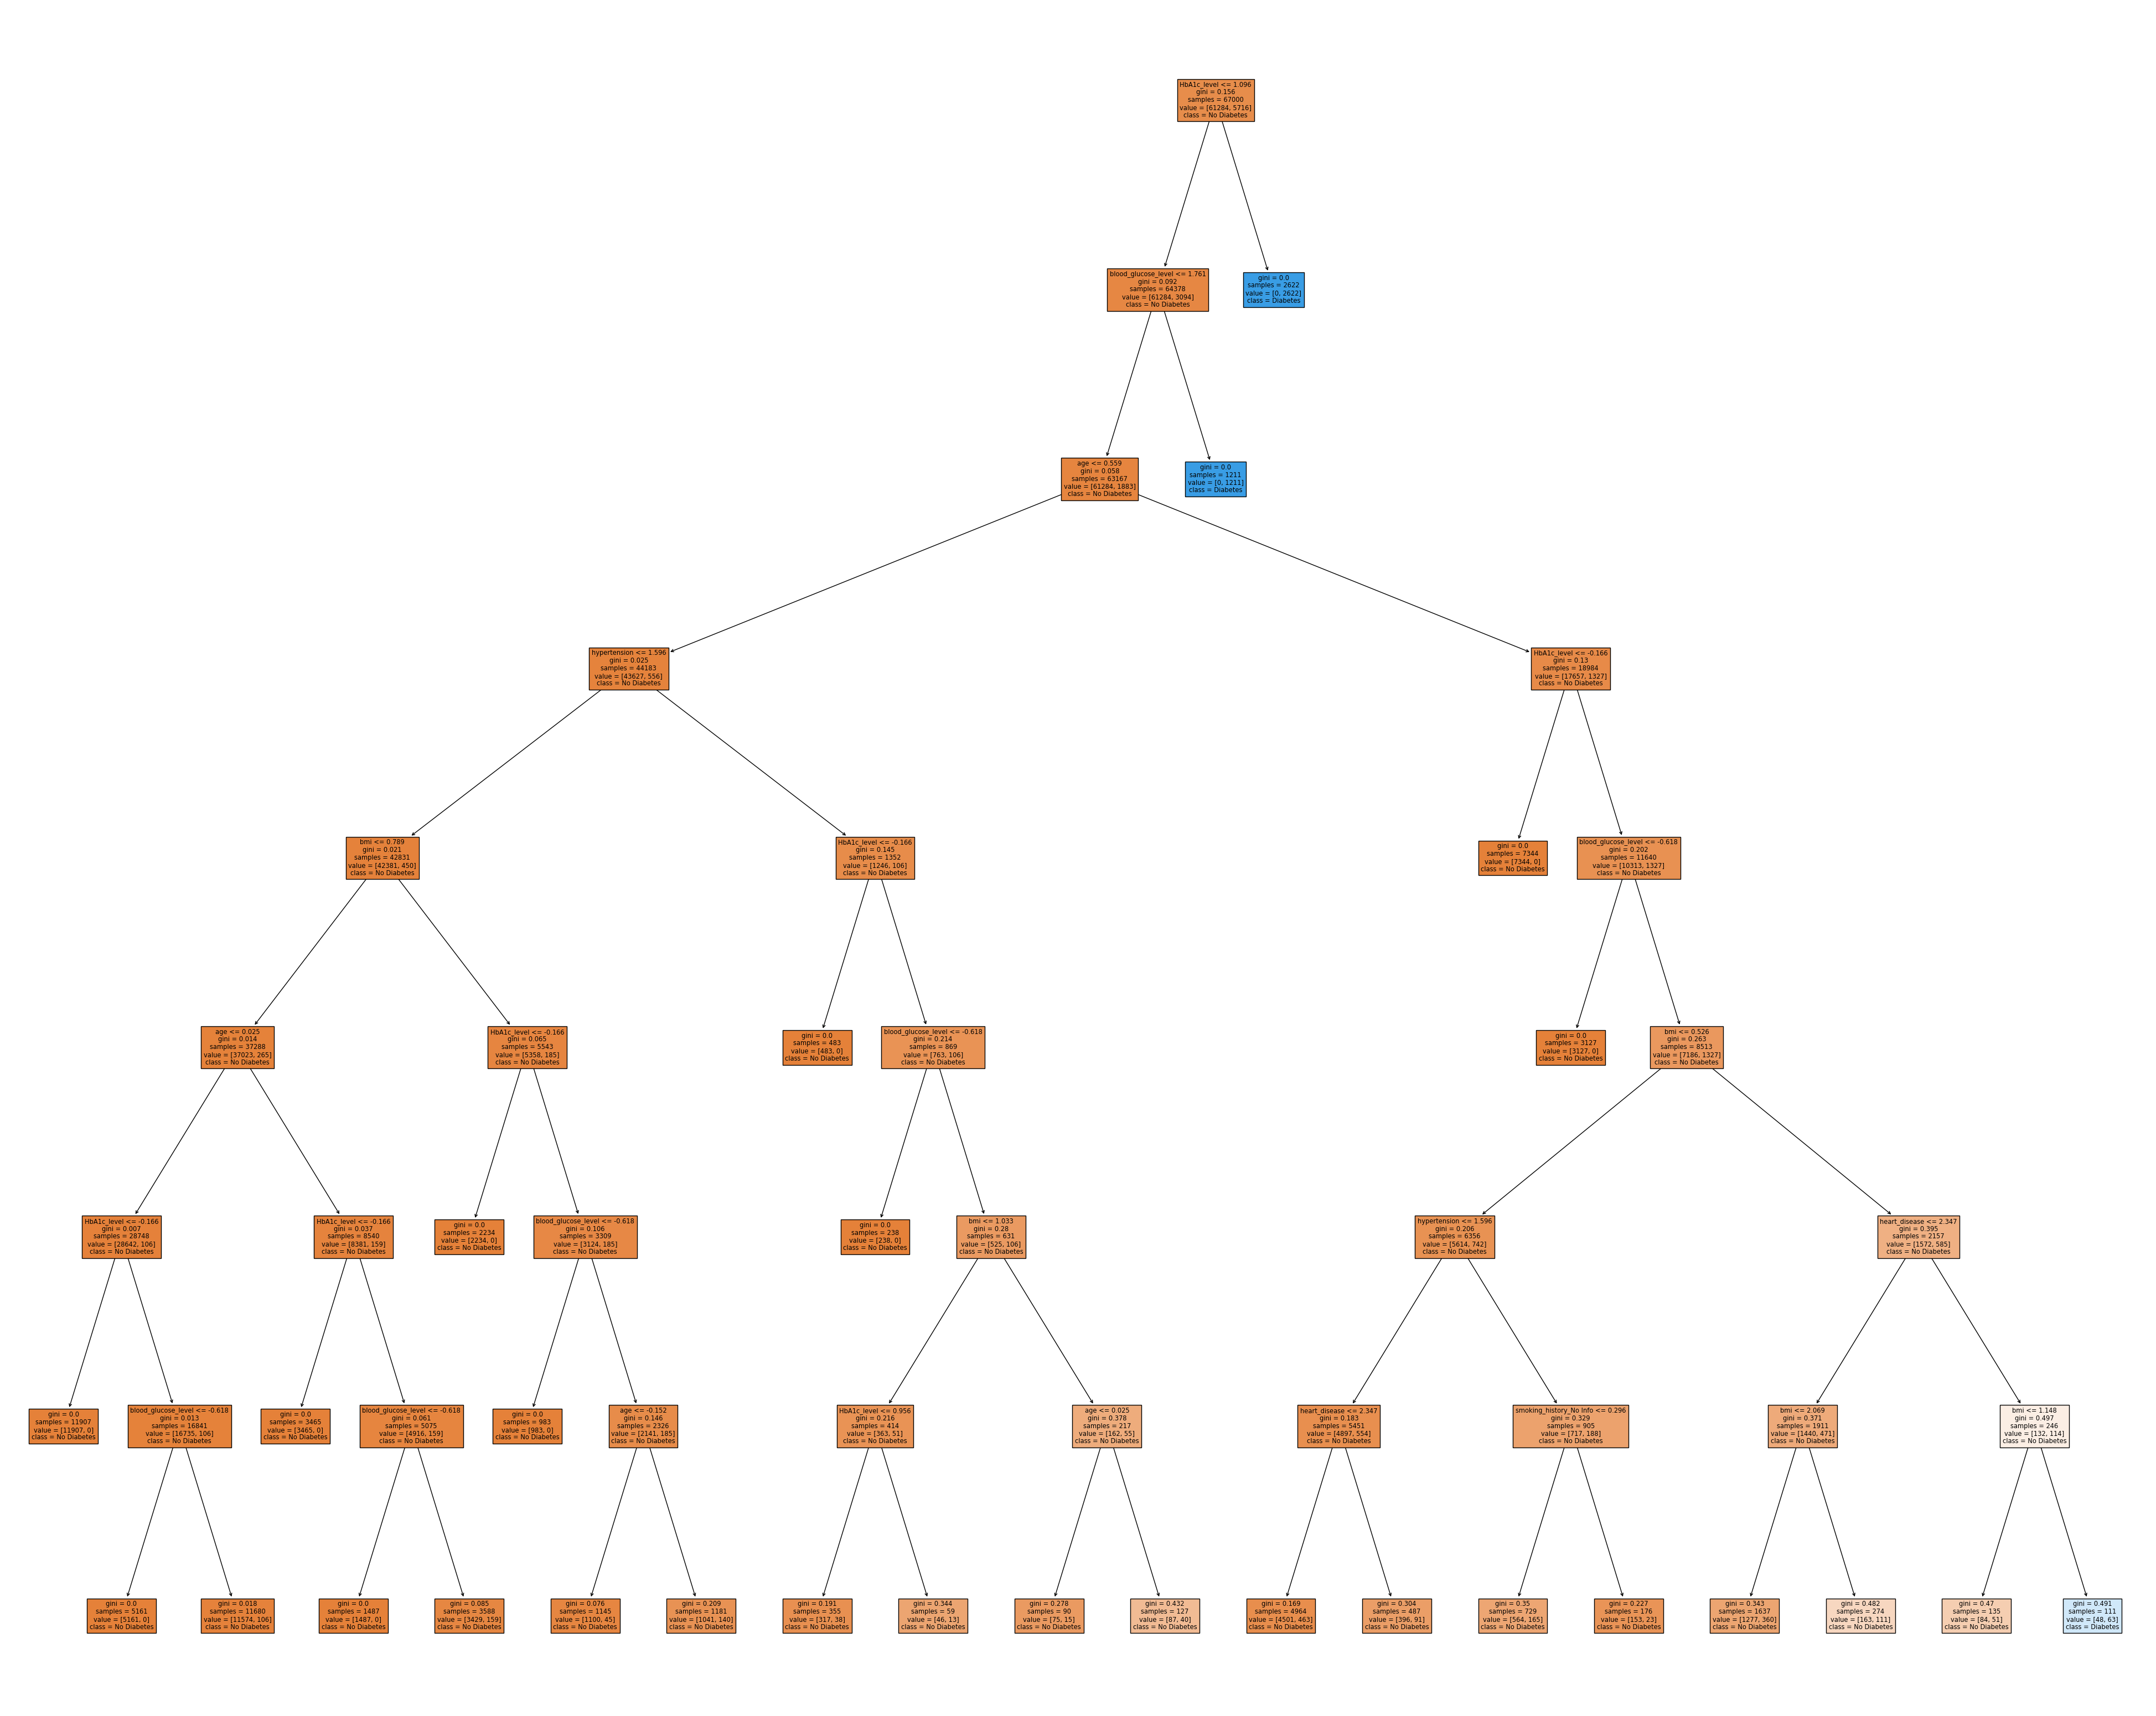

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,40))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.show()